In [1]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
import pandas as pd, scipy.stats as stats
from tqdm import tqdm
import torch, torch.nn as nn, torch.optim as optim, torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Black Scholes Generator

In [10]:
class bsGenerator:
    def __init__(self
                 , initialPrice = 100.0
                 , volatility = 0.2
                 , timeToExpiry = 1.0
                 , riskFreeRate = 0.0
                 , numPaths = 1
                 , numTradingDates = 100
                 , numBatches = 100
                 , batchSize = 128
                ):
        
        self.initialPrice = initialPrice
        self.volatility = volatility
        self.timeToExpiry = timeToExpiry
        self.riskFreeRate = riskFreeRate
        self.numTradingDates = numTradingDates
        self.deltaT = self.timeToExpiry / self.numTradingDates
        
        self.numBatches = numBatches
        self.batchSize = batchSize
        self.batchNo = 0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.batchNo >= self.numBatches:
            raise StopIteration()
        self.batchNo += 1
        
        # Black Scholes Paths created using geometric Brownian Motion
        # Closed form solution for Price Path
        logS = ((self.riskFreeRate - 0.5 * self.volatility **2) * self.deltaT +
                self.volatility * np.sqrt(self.deltaT) * np.random.normal(loc = 0.0, scale = 1.0
                                                                         , size = (self.numTradingDates + 1, self.batchSize)
                                                                         )
               )
        logS[0,] = np.zeros((1, self.batchSize))
        logS = np.cumsum(logS, axis = 0)

        return torch.from_numpy(self.initialPrice * np.exp(logS).transpose()).type(torch.FloatTensor) # working in rows not columns
                           
                           

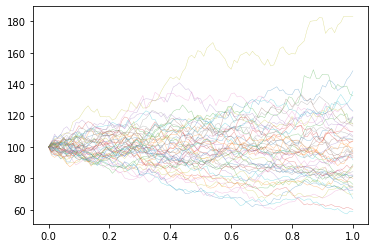

In [13]:
batchSize = 50

for S in bsGenerator(batchSize = batchSize):
    pass
for i in range(batchSize):
    plt.plot(np.linspace(0,1,100+1), S[i,:], alpha = 0.5, linewidth = 0.4)
plt.show()